In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/ddrdataset'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/kaggle/input/ddrdataset/DR_grading.csv
/kaggle/input/ddrdataset/DR_grading/DR_grading/007-3395-200.jpg
/kaggle/input/ddrdataset/DR_grading/DR_grading/20170427100644556.jpg
/kaggle/input/ddrdataset/DR_grading/DR_grading/20170613164132693.jpg
/kaggle/input/ddrdataset/DR_grading/DR_grading/20170525171854504.jpg
/kaggle/input/ddrdataset/DR_grading/DR_grading/20170427093433656.jpg
/kaggle/input/ddrdataset/DR_grading/DR_grading/20170328150336683.jpg
/kaggle/input/ddrdataset/DR_grading/DR_grading/007-0969-000.jpg
/kaggle/input/ddrdataset/DR_grading/DR_grading/007-3117-100.jpg
/kaggle/input/ddrdataset/DR_grading/DR_grading/20170629195829257.jpg
/kaggle/input/ddrdataset/DR_grading/DR_grading/007-6192-300.jpg
/kaggle/input/ddrdataset/DR_grading/DR_grading/007-3257-100.jpg
/kaggle/input/ddrdataset/DR_grading/DR_grading/20170331094615661.jpg
/kaggle/input/ddrdataset/DR_grading/DR_grading/20170630165348383.jpg
/kaggle/input/ddrdataset/DR_grading/DR_grading/20170408224031443.jpg
/kaggle/input/ddrda

In [3]:
# ✅ PREPROCESSING

import os
import cv2
import numpy as np
import pandas as pd

# Kaggle paths
csv_path = "/kaggle/input/ddrdataset/DR_grading.csv"
image_folder = "/kaggle/input/ddrdataset/DR_grading/DR_grading"
output_folder = "/kaggle/working/preprocessed_batches"
os.makedirs(output_folder, exist_ok=True)

# Load CSV
df = pd.read_csv(csv_path)

# Preprocessing settings
image_size = 256
batch_size = 500
batch_num = 0

X = []
y = []

for i, (img_name, label) in enumerate(zip(df["id_code"], df["diagnosis"])):
    img_path = os.path.join(image_folder, img_name)

    # Read and resize image
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (image_size, image_size))
        img = img / 255.0  # Normalize

        X.append(img)
        y.append(label)

    # Save in batches
    if (i + 1) % batch_size == 0 or (i + 1) == len(df):
        print(f"✅ Processed {i + 1}/{len(df)} images...")

        X_batch = np.array(X, dtype=np.float32)
        y_batch = np.array(y, dtype=np.int32)

        print(f"📦 Saving batch {batch_num} with shape: {X_batch.shape}")

        # Save the batch to /kaggle/working
        np.save(os.path.join(output_folder, f"X_batch_{batch_num}.npy"), X_batch)
        np.save(os.path.join(output_folder, f"y_batch_{batch_num}.npy"), y_batch)

        batch_num += 1
        del X_batch, y_batch
        X.clear()
        y.clear()

print("🎉 Processing complete! Batches saved in /kaggle/working/preprocessed_batches")


✅ Processed 500/12522 images...
📦 Saving batch 0 with shape: (500, 256, 256, 3)
✅ Processed 1000/12522 images...
📦 Saving batch 1 with shape: (500, 256, 256, 3)
✅ Processed 1500/12522 images...
📦 Saving batch 2 with shape: (500, 256, 256, 3)
✅ Processed 2000/12522 images...
📦 Saving batch 3 with shape: (500, 256, 256, 3)
✅ Processed 2500/12522 images...
📦 Saving batch 4 with shape: (500, 256, 256, 3)
✅ Processed 3000/12522 images...
📦 Saving batch 5 with shape: (500, 256, 256, 3)
✅ Processed 3500/12522 images...
📦 Saving batch 6 with shape: (500, 256, 256, 3)
✅ Processed 4000/12522 images...
📦 Saving batch 7 with shape: (500, 256, 256, 3)
✅ Processed 4500/12522 images...
📦 Saving batch 8 with shape: (500, 256, 256, 3)
✅ Processed 5000/12522 images...
📦 Saving batch 9 with shape: (500, 256, 256, 3)
✅ Processed 5500/12522 images...
📦 Saving batch 10 with shape: (500, 256, 256, 3)
✅ Processed 6000/12522 images...
📦 Saving batch 11 with shape: (500, 256, 256, 3)
✅ Processed 6500/12522 imag

Corrupt JPEG data: 35 extraneous bytes before marker 0xd9


✅ Processed 8000/12522 images...
📦 Saving batch 15 with shape: (500, 256, 256, 3)
✅ Processed 8500/12522 images...
📦 Saving batch 16 with shape: (500, 256, 256, 3)
✅ Processed 9000/12522 images...
📦 Saving batch 17 with shape: (500, 256, 256, 3)
✅ Processed 9500/12522 images...
📦 Saving batch 18 with shape: (500, 256, 256, 3)
✅ Processed 10000/12522 images...
📦 Saving batch 19 with shape: (500, 256, 256, 3)


Corrupt JPEG data: 38 extraneous bytes before marker 0xd9
Corrupt JPEG data: 34 extraneous bytes before marker 0xd9


✅ Processed 10500/12522 images...
📦 Saving batch 20 with shape: (500, 256, 256, 3)
✅ Processed 11000/12522 images...
📦 Saving batch 21 with shape: (500, 256, 256, 3)
✅ Processed 11500/12522 images...
📦 Saving batch 22 with shape: (500, 256, 256, 3)
✅ Processed 12000/12522 images...
📦 Saving batch 23 with shape: (500, 256, 256, 3)
✅ Processed 12500/12522 images...
📦 Saving batch 24 with shape: (500, 256, 256, 3)
✅ Processed 12522/12522 images...
📦 Saving batch 25 with shape: (22, 256, 256, 3)
🎉 Processing complete! Batches saved in /kaggle/working/preprocessed_batches


In [4]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Paths
csv_path = "/kaggle/input/ddrdataset/DR_grading.csv"
source_folder = "/kaggle/input/ddrdataset/DR_grading/DR_grading"
base_output_folder = "/kaggle/working/images"

# Read CSV
df = pd.read_csv(csv_path)

# Split: train (80%), val (16%), test (4%)
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['diagnosis'], random_state=42)
val_df, test_df = train_test_split(val_df, test_size=0.2, stratify=val_df['diagnosis'], random_state=42)

# Helper function to copy images into label-named folders
def copy_images(df, split_name):
    split_folder = os.path.join(base_output_folder, split_name)
    os.makedirs(split_folder, exist_ok=True)

    for img_name, label in zip(df['id_code'], df['diagnosis']):
        label_folder = os.path.join(split_folder, str(label))
        os.makedirs(label_folder, exist_ok=True)

        src_path = os.path.join(source_folder, img_name)
        dest_path = os.path.join(label_folder, img_name)

        if os.path.exists(src_path):
            shutil.copy2(src_path, dest_path)

# Copying images
print("📂 Copying training images...")
copy_images(train_df, "train")

print("📂 Copying validation images...")
copy_images(val_df, "val")

print("📂 Copying testing images...")
copy_images(test_df, "test")

print("✅ All images copied and organized!")


📂 Copying training images...
📂 Copying validation images...
📂 Copying testing images...
✅ All images copied and organized!


In [5]:
# ✅ AUGMENTATION CODE (only for training set)

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img, save_img
import numpy as np

# Paths
train_dir = "/kaggle/working/images/train"  # Already created by you

# Augmentation settings
augmenter = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augmented images output folder
augmented_output_folder = "/kaggle/working/images_augmented/train"
os.makedirs(augmented_output_folder, exist_ok=True)

# Process each class folder
for class_label in os.listdir(train_dir):
    class_folder = os.path.join(train_dir, class_label)
    augmented_class_folder = os.path.join(augmented_output_folder, class_label)
    os.makedirs(augmented_class_folder, exist_ok=True)

    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)

        # Load image
        img = load_img(img_path, target_size=(256, 256))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Save original image
        save_img(os.path.join(augmented_class_folder, img_name), img)

        # Generate **ONLY 1** augmented image per original image
        aug_iter = augmenter.flow(img_array, batch_size=1)
        aug_img = next(aug_iter)[0].astype('uint8')

        # Save augmented image
        aug_img_name = img_name.split('.')[0] + '_aug.png'
        save_img(os.path.join(augmented_class_folder, aug_img_name), aug_img)

print("🎉 Data augmentation complete! Augmented images saved separately.")


🎉 Data augmentation complete! Augmented images saved separately.


In [6]:
import os
import shutil

# Paths
original_train_folder = "/kaggle/working/images/train"
augmented_train_folder = "/kaggle/working/images_augmented/train"
final_train_folder = "/kaggle/working/final_train"

# Create final train folder if not exists
os.makedirs(final_train_folder, exist_ok=True)

# Helper function to copy images
def copy_images(src_folder, dest_folder):
    for label in os.listdir(src_folder):
        label_src_path = os.path.join(src_folder, label)
        label_dest_path = os.path.join(dest_folder, label)
        os.makedirs(label_dest_path, exist_ok=True)

        for img_file in os.listdir(label_src_path):
            src_img_path = os.path.join(label_src_path, img_file)
            dest_img_path = os.path.join(label_dest_path, img_file)

            shutil.copy2(src_img_path, dest_img_path)

# First copy original images
print("📂 Copying original training images...")
copy_images(original_train_folder, final_train_folder)

# Then copy augmented images
print("📂 Copying augmented training images...")
copy_images(augmented_train_folder, final_train_folder)

print("✅ Final training dataset ready at /kaggle/working/final_train")


📂 Copying original training images...
📂 Copying augmented training images...
✅ Final training dataset ready at /kaggle/working/final_train


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/kaggle/working/final_train"  # ✅ Combined original + augmented
val_dir = "/kaggle/working/images/val"
test_dir = "/kaggle/working/images/test"

# --- 3. ImageDataGenerator setup ---
train_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# --- 4. Create generators ---
batch_size = 64
img_size = (256, 256)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 20034 images belonging to 5 classes.
Found 2004 images belonging to 5 classes.
Found 501 images belonging to 5 classes.


In [8]:
# ✅ VGG19 model training

from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# --- 1. Load VGG19 base ---
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional base (so we only train the top layers first)
for layer in vgg_base.layers:
    layer.trainable = False
# Unfreeze the last few layers
for layer in vgg_base.layers[-8:]:  # Last 8 layers
    layer.trainable = True


# --- 2. Add custom classification layers ---
x = vgg_base.output
x = GlobalAveragePooling2D()(x)  # Global pooling instead of Flatten
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer

model = Model(inputs=vgg_base.input, outputs=predictions)

# --- 3. Compile the model ---
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- 4. Setup callbacks ---
checkpoint = ModelCheckpoint('best_vgg19_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

callbacks = [checkpoint, earlystop]

# --- 5. Train the model ---
epochs = 20 # You can change this as needed

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=callbacks
)

print("🎯 VGG19 training complete!")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1745852420.743990      93 service.cc:148] XLA service 0x7fc47800b9f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745852420.745166      93 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745852420.745191      93 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745852421.419551      93 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-28 15:00:31.011797: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng12{k11=0} for conv (f32[64,128,128,1

314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 873ms/step - accuracy: 0.4864 - loss: 1.2111
Epoch 1: val_accuracy improved from -inf to 0.61776, saving model to best_vgg19_model.keras
314/314 ━━━━━━━━━━━━━━━━━━━━ 373s 1s/step - accuracy: 0.4866 - loss: 1.2108 - val_accuracy: 0.6178 - val_loss: 0.9439
Epoch 2/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - accuracy: 0.6376 - loss: 0.9226
Epoch 2: val_accuracy improved from 0.61776 to 0.67315, saving model to best_vgg19_model.keras
314/314 ━━━━━━━━━━━━━━━━━━━━ 305s 924ms/step - accuracy: 0.6376 - loss: 0.9226 - val_accuracy: 0.6732 - val_loss: 0.8369
Epoch 3/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - accuracy: 0.6687 - loss: 0.8603
Epoch 3: val_accuracy improved from 0.67315 to 0.69261, saving model to best_vgg19_model.keras
314/314 ━━━━━━━━━━━━━━━━━━━━ 290s 919ms/step - accuracy: 0.6687 - loss: 0.8602 - val_accuracy: 0.6926 - val_loss: 0.7938
Epoch 4/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.6960 - loss: 0.8038
Epoch 4: val_accu

In [9]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


Final Training Accuracy: 0.8623
Final Validation Accuracy: 0.7610


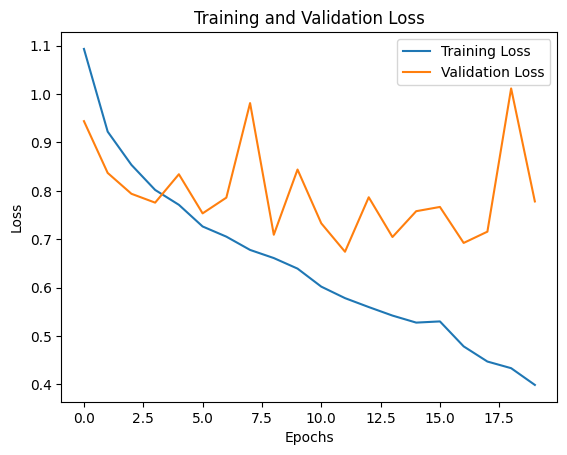

In [10]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of the model's fit function
# Example: history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


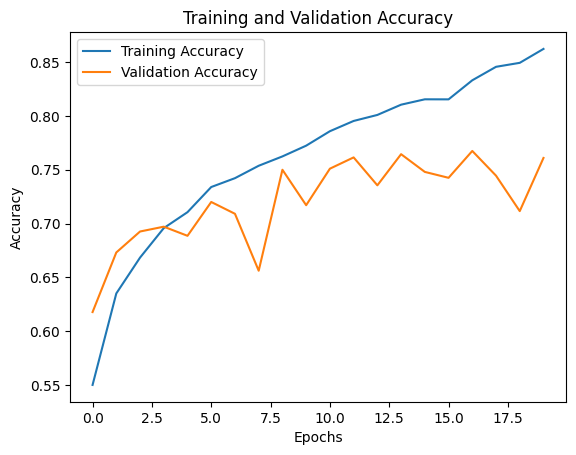

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step 


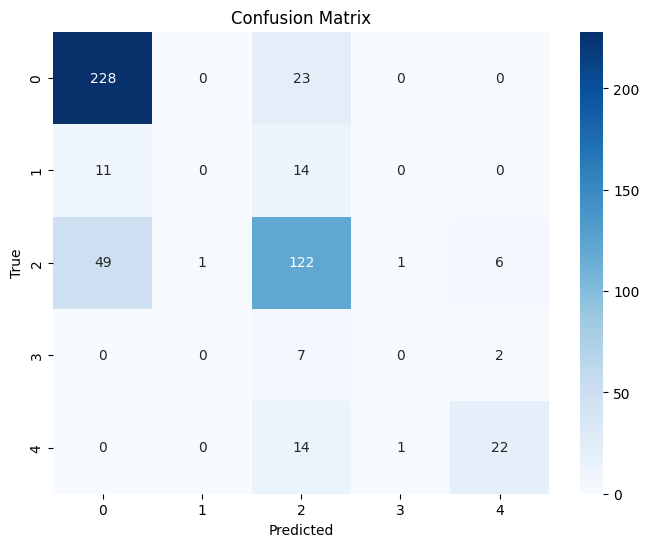

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

steps = int(np.ceil(test_generator.samples / test_generator.batch_size))


y_pred = model.predict(test_generator, steps=steps, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes  # True labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [13]:
from sklearn.metrics import classification_report

class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


              precision    recall  f1-score   support

           0       0.79      0.91      0.85       251
           1       0.00      0.00      0.00        25
           2       0.68      0.68      0.68       179
           3       0.00      0.00      0.00         9
           4       0.73      0.59      0.66        37

    accuracy                           0.74       501
   macro avg       0.44      0.44      0.44       501
weighted avg       0.69      0.74      0.72       501



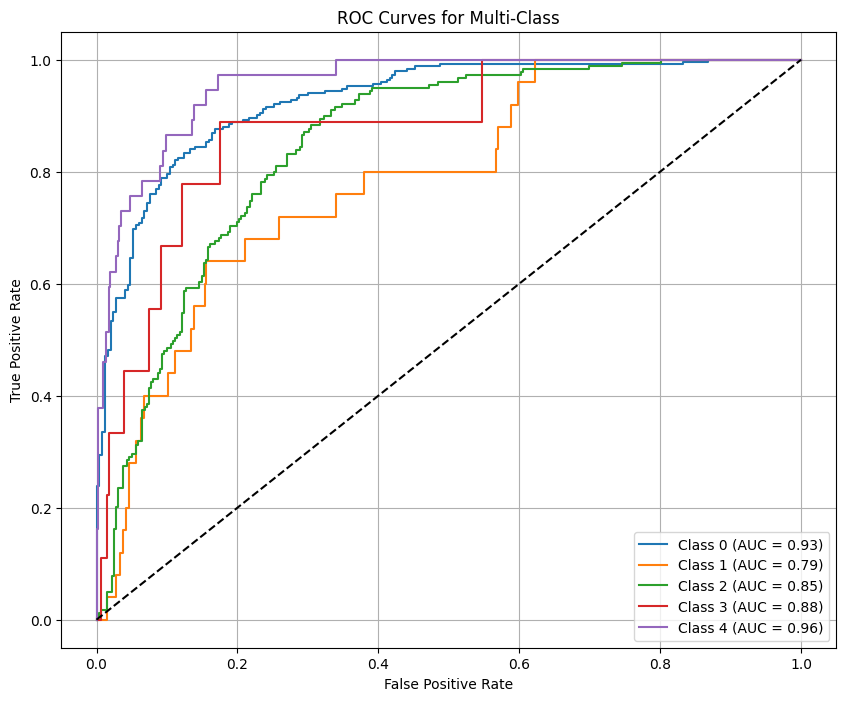

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

n_classes = len(test_generator.class_indices)

# Binarize labels
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curves for Multi-Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [15]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_true, y_pred_classes)
print(f"Cohen's Kappa Score: {kappa:.4f}")


Cohen's Kappa Score: 0.5553


In [16]:
from sklearn.metrics import cohen_kappa_score

# Quadratic Weighted Kappa (weights='quadratic')
qwk = cohen_kappa_score(y_true, y_pred_classes, weights='quadratic')
print(f"Quadratic Weighted Kappa Score: {qwk:.4f}")


Quadratic Weighted Kappa Score: 0.7384
